In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [3]:
df=pd.read_csv("loan.csv",low_memory=False)

In [4]:
df.shape

(39717, 111)

In [5]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [6]:
#clean the data
df.isnull().all(axis=0).sum()

54

In [7]:
#delete the columns with nan values
df=df.dropna(axis =1 ,how ='all')

In [8]:
#number of empty col 
df.isnull().all(axis=0).sum()

0

In [9]:
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [10]:
df.mths_since_last_delinq.count()/df.shape[0]*100

35.33751290379434

In [11]:
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [12]:
df.drop(columns=['mths_since_last_delinq','mths_since_last_record','next_pymnt_d'], axis =1, inplace=True)
df.shape

(39717, 54)

In [13]:
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [14]:
df.drop(columns = ['emp_title','desc','member_id','url','zip_code','tax_liens'], axis =1, inplace=True)
df.shape

(39717, 48)

In [15]:
df.isnull().sum()

id                               0
loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
grade                            0
sub_grade                        0
emp_length                    1075
home_ownership                   0
annual_inc                       0
verification_status              0
issue_d                          0
loan_status                      0
pymnt_plan                       0
purpose                          0
title                           11
addr_state                       0
dti                              0
delinq_2yrs                      0
earliest_cr_line                 0
inq_last_6mths                   0
open_acc                         0
pub_rec                          0
revol_bal                        0
revol_util                      50
total_acc                        0
initial_list_status 

In [16]:
#Duplicate
print(df.duplicated(subset=None, keep='first').count())
repeat=df[df.duplicated(['id'])]
repeat

39717


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies


In [17]:
df.shape

(39717, 48)

In [18]:
df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,...,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,...,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,...,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,...,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0
4,1075358,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,...,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0


In [19]:
# remove  % from int_rate
df.int_rate=df.int_rate.str.rstrip("%")
df.int_rate=df.int_rate.astype('float')
df.int_rate.head(5)

0    10.65
1    15.27
2    15.96
3    13.49
4    12.69
Name: int_rate, dtype: float64

In [20]:
#emp_length Remove + year from the column
df.emp_length.fillna('0',inplace=True)
df['emp_length']=df.emp_length.str.extract('(\d+)')
df.head()  

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10,...,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,C4,1,...,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0
2,1077175,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10,...,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0
3,1076863,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10,...,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0
4,1075358,3000,3000,3000.0,60 months,12.69,67.79,B,B5,1,...,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0


In [21]:
# remove  % from int_rate
df.revol_util=df.revol_util.str.rstrip("%")
df.revol_util=df.revol_util.astype('float')
df.revol_util.head(5)

0    83.7
1     9.4
2    98.5
3    21.0
4    53.9
Name: revol_util, dtype: float64

In [22]:
df.pub_rec_bankruptcies= df.pub_rec_bankruptcies.fillna(df.pub_rec_bankruptcies.median())
df.pub_rec_bankruptcies.head(5)


0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: pub_rec_bankruptcies, dtype: float64

In [23]:
df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10,...,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,C4,1,...,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0
2,1077175,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10,...,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0
3,1076863,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10,...,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0
4,1075358,3000,3000,3000.0,60 months,12.69,67.79,B,B5,1,...,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0


In [24]:
col1 = ['funded_amnt_inv','installment','annual_inc','dti','emp_length','total_pymnt','loan_amnt','funded_amnt','int_rate']
df[col1] = df[col1].apply(pd.to_numeric)

In [25]:
df.head()


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10,...,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,C4,1,...,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0
2,1077175,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10,...,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0
3,1076863,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10,...,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0
4,1075358,3000,3000,3000.0,60 months,12.69,67.79,B,B5,1,...,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0


In [26]:
df.dtypes

id                              int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                      float64
installment                   float64
grade                          object
sub_grade                      object
emp_length                      int64
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
purpose                        object
title                          object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
earliest_cr_line               object
inq_last_6mths                  int64
open_acc                        int64
pub_rec                         int64
revol_bal                       int64
revol_util  

In [27]:
df.issue_d = pd.to_datetime(df.issue_d,format='%b-%y')
df['year']=df['issue_d'].dt.year
df['month']=df['issue_d'].dt.month
df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,year,month
0,1077501,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10,...,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,2011,12
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,C4,1,...,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,2011,12
2,1077175,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10,...,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,2011,12
3,1076863,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10,...,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,2011,12
4,1075358,3000,3000,3000.0,60 months,12.69,67.79,B,B5,1,...,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,2011,12


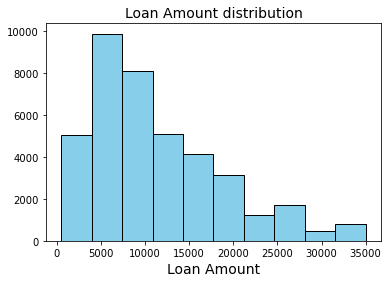

In [28]:
#Analysis (univariate)
plt.hist(df.loan_amnt,edgecolor='black',color='skyblue')
plt.title("Loan Amount distribution",fontsize=14)
plt.xlabel("Loan Amount",fontsize=14)
plt.show()

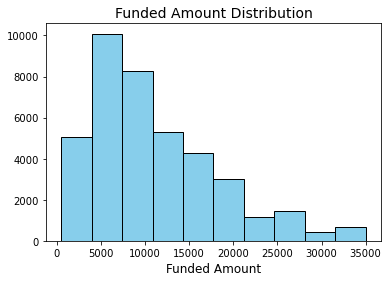

<Figure size 288x72 with 0 Axes>

In [29]:

plt.hist(df.funded_amnt,edgecolor='black',color='skyblue')
plt.title("Funded Amount Distribution",fontsize=14)
plt.xlabel("Funded Amount",fontsize=12)
f = plt.figure()
f.set_figwidth(4)
f.set_figheight(1)
plt.show()

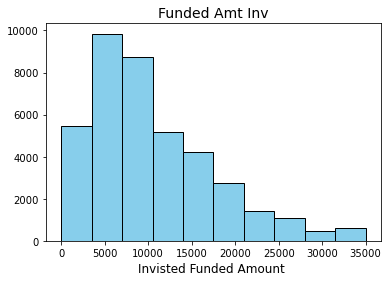

In [30]:

plt.hist(df.funded_amnt_inv,edgecolor='black',color='skyblue')
plt.title("Funded Amt Inv",fontsize=14)
plt.xlabel("Invisted Funded Amount ",fontsize=12)
plt.show()

## All 3 loan chart looks same, max amt from 5000 to 15000


C:\Users\Excelize_ERP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Loan Amt')

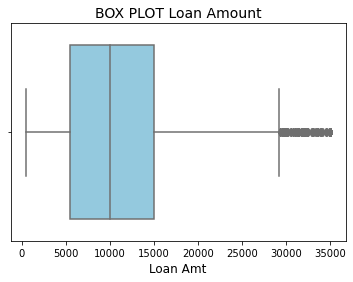

In [32]:
#Box Plot
ab=sns.boxplot(df.loan_amnt,color='Skyblue')
ab.set_title('BOX PLOT Loan Amount', fontsize=14)
ab.set_xlabel('Loan Amt',fontsize=12)

## using box plot it is also displaying loan amt distributed max amt is 5000 to 15000

C:\Users\Excelize_ERP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


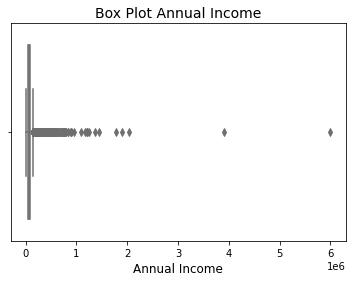

In [33]:
#Box plot for annual income
ax = sns.boxplot(df['annual_inc'] ,color='Skyblue')
ax.set_title('Box Plot Annual Income',fontsize=14)
ax.set_xlabel('Annual Income',fontsize=12)
plt.show()


C:\Users\Excelize_ERP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


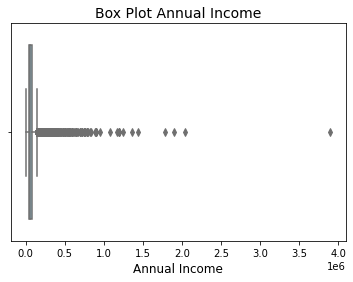

In [34]:
df=df[df["annual_inc"]< df["annual_inc"].quantile(1)]
ax = sns.boxplot(df['annual_inc'] ,color='Skyblue')
ax.set_title('Box Plot Annual Income',fontsize=14)
ax.set_xlabel('Annual Income',fontsize=12)
plt.show()


In [38]:
import warnings
warnings.filterwarnings("ignore")

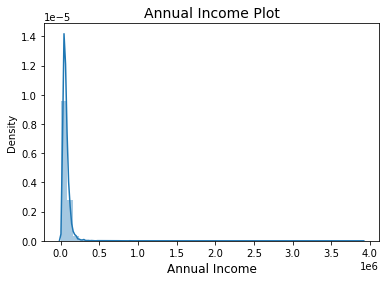

In [39]:

 
p = sns.distplot(df['annual_inc'])
p.set_title('Annual Income Plot',fontsize=14 )
p.set_xlabel('Annual Income',fontsize=12 )
plt.show()

## most of the customer are from annual income 40,000 to 90,000

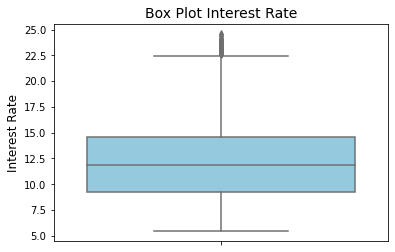

In [40]:
#Interest Rate
ax = sns.boxplot(y=df['int_rate'],color='Skyblue')
ax.set_title('Box Plot Interest Rate',fontsize=14 ,color='black')
ax.set_ylabel('Interest Rate',fontsize=12,color='black')
plt.show()

## Interest Rate is in between 10 to 15 %

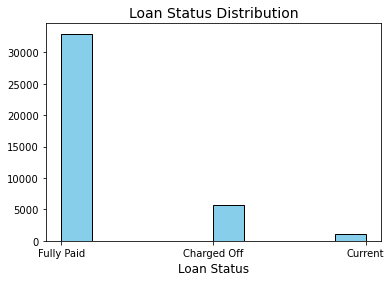

In [41]:
plt.hist(df.loan_status,edgecolor='black',color='skyblue')
plt.title("Loan Status Distribution", fontsize=14)
plt.xlabel("Loan Status" ,fontsize=12)
plt.show()

## from above chart most of the loans are fully paid and around 5000 are charged off and some are current loan

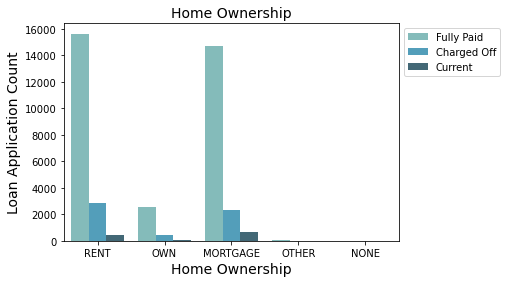

In [42]:

p = sns.countplot(x="home_ownership" ,data=df,hue='loan_status',palette='GnBu_d')
p.legend(bbox_to_anchor=(1, 1))
p.set_title('Employment tenure Plot',fontsize=14 )
p.set_title('Home Ownership',fontsize=14)
p.set_xlabel('Home Ownership',fontsize=14)
p.set_ylabel('Loan Application Count',fontsize=14)
plt.show()

## People lives in Rent and Mortgage is high as compaired to others, Charged off is also high in this case

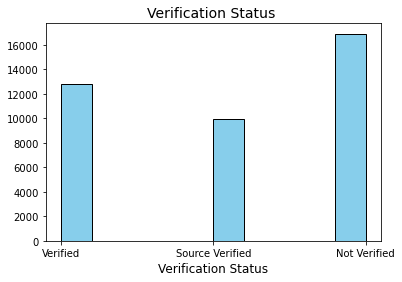

In [43]:
plt.hist(df.verification_status,edgecolor='black',color='skyblue')
plt.title("Verification Status " ,fontsize=14 ,color='black')
plt.xlabel("Verification Status",fontsize=12)
plt.show()

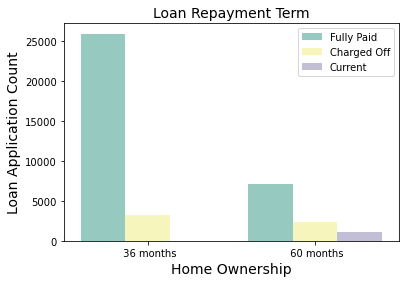

In [44]:


p = sns.countplot(x="term" ,data=df,hue='loan_status',palette='Set3')
p.legend(bbox_to_anchor=(1, 1))
p.set_title('Loan Paying Term',fontsize=14 )
p.set_title('Loan Repayment Term',fontsize=14)
p.set_xlabel('Home Ownership',fontsize=14)
p.set_ylabel('Loan Application Count',fontsize=14)
plt.show()

## loan application is more for 36 month as comparied to 60 months, and charged off is more in 36 month application

## BIVARIANTE ANALYSIS

Text(0.5, 1.0, 'Purpose of Loans vs Charged-off Percentage ')

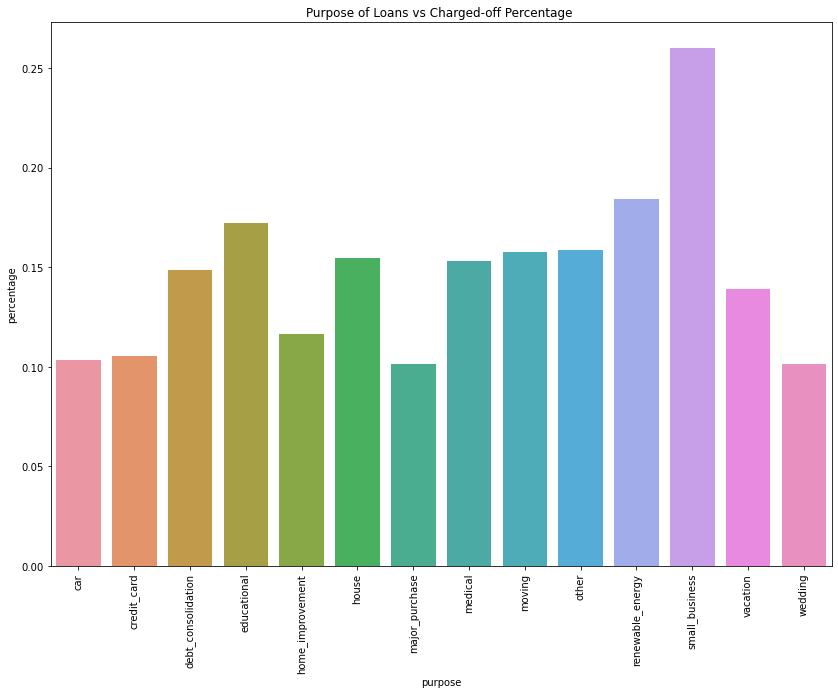

In [48]:
#Purpose of loan and charged off percent

df1 = df.groupby(['purpose', 'loan_status'], as_index=False)['id'].count()
df1['percentage'] = df1.groupby('purpose').transform(lambda x: x/x.sum())
df1 = df1[df1.loan_status == 'Charged Off']
plt.figure(figsize=(14,10))
sns.barplot(x='purpose', y='percentage', data=df1)
plt.xticks(rotation=90)
plt.title('Purpose of Loans vs Charged-off Percentage ')

## Small Business is getting more charged off


In [49]:
# categorise loan amounts,annual incomes,intrest rates

df['loan_amnt_cats'] = pd.cut(df['loan_amnt'], [0, 7000, 14000, 21000, 28000, 35000], labels=['0-7000', '7000-14000', '14000-21000', '21000-28000', '28000 +'])

df['annual_inc_cats'] = pd.cut(df['annual_inc'], [0, 20000, 40000, 60000, 80000,1000000], labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000 +'])

df['int_rate_cats'] = pd.cut(df['int_rate'], [0, 10, 12.5, 16, 20], labels=['0-10', '10-13', '12.5-16', '16 +'])

df['dti_cats'] = pd.cut(df['dti'], [0, 5, 10, 15, 20, 25], labels=['0-5', '05-10', '10-15', '15-20', '25+'])

In [50]:
df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,year,month,loan_amnt_cats,annual_inc_cats,int_rate_cats,dti_cats
0,1077501,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10,...,0,0.0,0,0.0,2011,12,0-7000,20000-40000,10-13,NaN
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,C4,1,...,0,0.0,0,0.0,2011,12,0-7000,20000-40000,12.5-16,0-5
2,1077175,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10,...,0,0.0,0,0.0,2011,12,0-7000,0-20000,12.5-16,05-10
3,1076863,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10,...,0,0.0,0,0.0,2011,12,7000-14000,40000-60000,12.5-16,15-20
4,1075358,3000,3000,3000.0,60 months,12.69,67.79,B,B5,1,...,0,0.0,0,0.0,2011,12,0-7000,60000-80000,12.5-16,15-20


In [51]:
# Analysis on annual income against Chargedoff Proportion 

annual_inc_range_vs_loan = df.groupby(['annual_inc_cats', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
annual_inc_range_vs_loan['Total'] = annual_inc_range_vs_loan['Charged Off'] + annual_inc_range_vs_loan['Current'] + annual_inc_range_vs_loan['Fully Paid'] 
annual_inc_range_vs_loan['Chargedoff_Proportion'] = annual_inc_range_vs_loan['Charged Off'] / annual_inc_range_vs_loan['Total']
annual_inc_range_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)



loan_status,annual_inc_cats,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
0,0-20000,237,9,943,1189,0.199327
1,20000-40000,1514,170,7004,8688,0.174263
2,40000-60000,1729,345,9534,11608,0.148949
3,60000-80000,1024,240,6597,7861,0.130263
4,80000 +,1122,376,8859,10357,0.108333


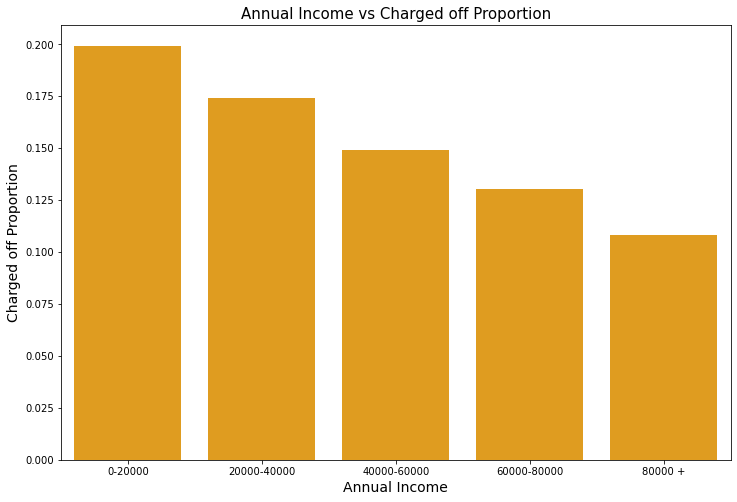

In [58]:


fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.set_title('Annual Income vs Charged off Proportion',fontsize=15)
ax1=sns.barplot(x='annual_inc_cats', y='Chargedoff_Proportion', data=annual_inc_range_vs_loan, color='orange')
ax1.set_ylabel('Charged off Proportion',fontsize=14)
ax1.set_xlabel('Annual Income',fontsize=14)
plt.show()

annual income greater then 80000 charged off is less, if it is 0-20000 charged off is more

In [59]:
# Bivariate Analysis on interest rate against Chargedoff_Proportion

interest_rate_vs_loan_status = df.groupby(['int_rate_cats', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
interest_rate_vs_loan_status['Total'] = interest_rate_vs_loan_status['Charged Off'] + interest_rate_vs_loan_status['Current'] + interest_rate_vs_loan_status['Fully Paid'] 
interest_rate_vs_loan_status['Chargedoff_Proportion'] = interest_rate_vs_loan_status['Charged Off'] / interest_rate_vs_loan_status['Total']
interest_rate_vs_loan_status.sort_values('Chargedoff_Proportion', ascending=False)


loan_status,int_rate_cats,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
3,16 +,1266,359,3372,4997,0.253352
2,12.5-16,2003,332,9469,11804,0.169688
1,10-13,1232,270,8148,9650,0.127668
0,0-10,830,77,11486,12393,0.066973


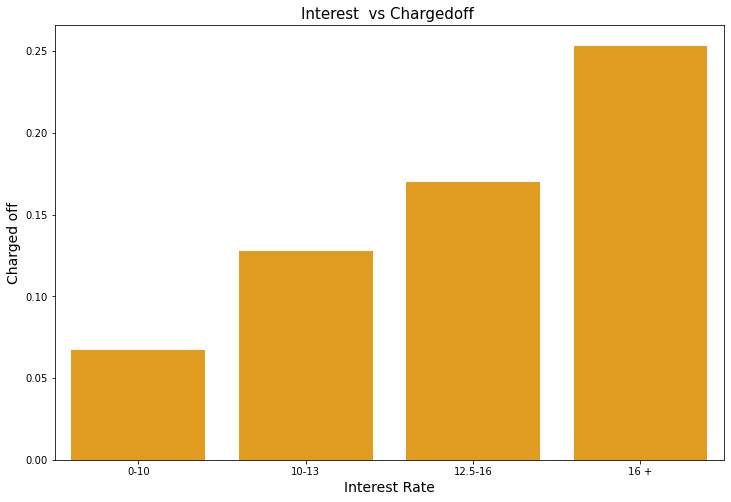

In [60]:
# Lets draw some bar plots on data calculated 

fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.set_title('Interest  vs Chargedoff ',fontsize=15)
ax1=sns.barplot(x='int_rate_cats', y='Chargedoff_Proportion', data=interest_rate_vs_loan_status,color='orange')
ax1.set_xlabel('Interest Rate',fontsize=14)
ax1.set_ylabel('Charged off',fontsize=14)
plt.show()


## if interest rate is higher 16 + more chances of charged off as compared to low intereset rate

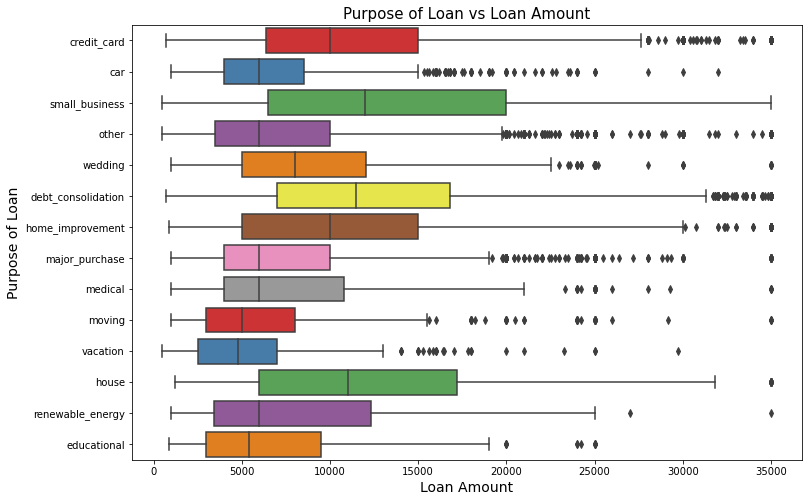

In [55]:
# Box Plot - Puprose of loan vs Loan amount

plt.figure(figsize=(12,8) )
ax = sns.boxplot(y='purpose', x='loan_amnt', data =df,palette='Set1')
ax.set_title('Purpose of Loan vs Loan Amount',fontsize=15 )
ax.set_ylabel('Purpose of Loan',fontsize=14 )
ax.set_xlabel('Loan Amount',fontsize=14 )
plt.show()


## Loan for small business is higher

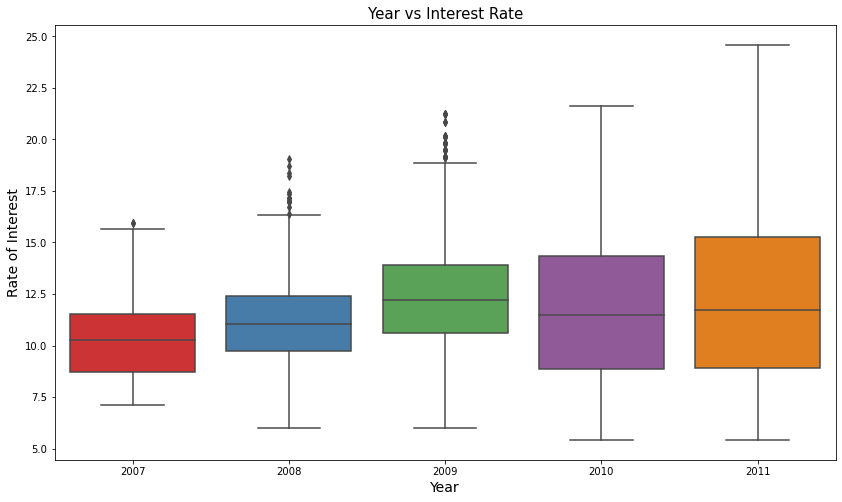

In [61]:
# Box Plot : year and  Interest Rate

plt.figure(figsize=(14,8) )
ax = sns.boxplot(y='int_rate', x='year', data =df,palette='Set1')
ax.set_title('Year vs Interest Rate',fontsize=15 )
ax.set_ylabel('Rate of Interest',fontsize=14 )
ax.set_xlabel('Year',fontsize=14 )
plt.show()


## as year increases interest also increases

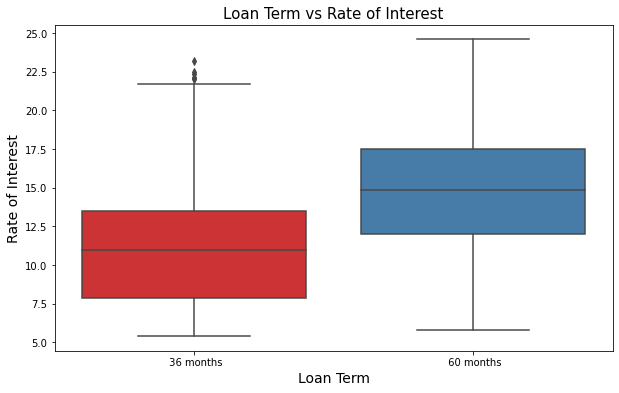

In [63]:
# Box Plot : Term of loan vs Interest Rate

plt.figure(figsize=(10,6) )
ax = sns.boxplot(y='int_rate', x='term', data =df,palette='Set1')
ax.set_title('Loan Term vs Rate of Interest',fontsize=15)
ax.set_ylabel('Rate of Interest',fontsize=14)
ax.set_xlabel('Loan Term',fontsize=14)
plt.show()


## Interest is greater with 60 months

# Thank you